## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
a=-2
b=1
X=np.linspace(0,20)

Y=a*X+b
Y.shape

(50,)

#### Plot your data points. 

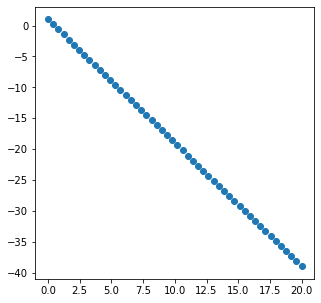

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [4]:
def SingleVariableGD (Data,Target,alpha):
    Earr=[]
    Carr=[]
    TH1arr=[]
    TH0arr=[]
    count=1
    Carr.append(count)
    X0=Data[:,0]
    X1=Data[:,1]
    TH0=0
    TH1=0
    TH1arr.append(TH1)
    TH0arr.append(TH0)
    TH=np.array([[TH0],[TH1]])
    YD=Data@TH
    Error=YD-Target
    MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
    Earr.append(MSError)
    GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
    GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
    GDV=np.array([[GDTH0],[GDTH1]])
    GDVN=np.linalg.norm(GDV)
    while(GDVN>=0.001):
        count+=1
        Carr.append(count)
        TH0=TH0-(alpha*GDTH0)
        TH1=TH1-(alpha*GDTH1)
        TH1arr.append(TH1)
        TH0arr.append(TH0)
        TH=np.array([[TH0],[TH1]])
        YD=Data@TH
        Error=YD-Target
        MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
        Earr.append(MSError)
        GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
        GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
        GDV=np.array([[GDTH0],[GDTH1]])
        GDVN=np.linalg.norm(GDV)
        if (abs(Earr[-1]-Earr[-2])<0.01):
            break
        
    return TH,Carr,Earr,count,TH1arr,TH0arr
    

In [5]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
ones=np.ones(shape=Y.shape)
Features=np.hstack([ones,X])
Features

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.40816327],
       [ 1.        ,  0.81632653],
       [ 1.        ,  1.2244898 ],
       [ 1.        ,  1.63265306],
       [ 1.        ,  2.04081633],
       [ 1.        ,  2.44897959],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.26530612],
       [ 1.        ,  3.67346939],
       [ 1.        ,  4.08163265],
       [ 1.        ,  4.48979592],
       [ 1.        ,  4.89795918],
       [ 1.        ,  5.30612245],
       [ 1.        ,  5.71428571],
       [ 1.        ,  6.12244898],
       [ 1.        ,  6.53061224],
       [ 1.        ,  6.93877551],
       [ 1.        ,  7.34693878],
       [ 1.        ,  7.75510204],
       [ 1.        ,  8.16326531],
       [ 1.        ,  8.57142857],
       [ 1.        ,  8.97959184],
       [ 1.        ,  9.3877551 ],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.20408163],
       [ 1.        , 10.6122449 ],
       [ 1.        , 11.02040816],
       [ 1.        ,

In [6]:
TH,Carr,Earr,count,TH1arr,TH0arr=SingleVariableGD (Features,Y,0.001)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.9972924318863261

In [7]:
def GD_SV_ALL_in_1 (Features,Y,alpha):
    TH,Carr,Earr,count,TH1arr,TH0arr=SingleVariableGD (Features,Y,alpha)
    Y_pred_GD=Features@TH
    r2_score(Y,Y_pred_GD)
    plt.figure(figsize=(5,5))
    plt.plot(Carr,Earr)
    plt.xlabel("Number of eboch")
    plt.ylabel("MSE")
    plt.figure(figsize=(5,5))
    plt.plot(TH0arr,Earr)
    plt.xlabel("Theta0")
    plt.ylabel("MSE")
    plt.figure(figsize=(5,5))
    plt.plot(TH1arr,Earr)
    plt.xlabel("Theta1")
    plt.ylabel("MSE")
    x=np.linspace(0,20)
    y=a*x+b
    Thetas=[]
    for i in range(0,len(TH0arr)):
        Thetas.append([TH0arr[i],TH1arr[i]])
    plt.figure(figsize=(5,5))
    for i,j in enumerate (Thetas) :
        plt.plot(x,j[1]*x+j[0],label=f'MES{Earr[i]}')
        plt.legend()
    plt.title(" all regression lines till converge")

    plt.figure(figsize=(5,5))
    X=Features[:,1]
    plt.scatter(X,Y)
    plt.plot(x,Thetas[-1][1]*x+Thetas[-1][0])
    plt.title("Best fitting line")

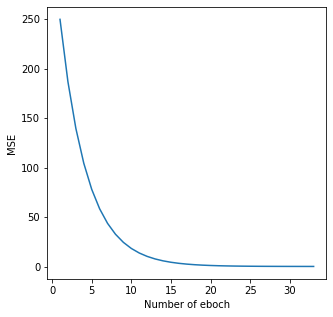

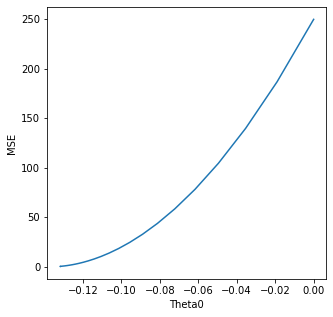

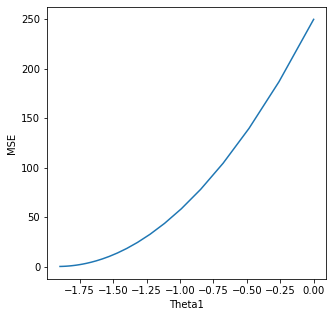

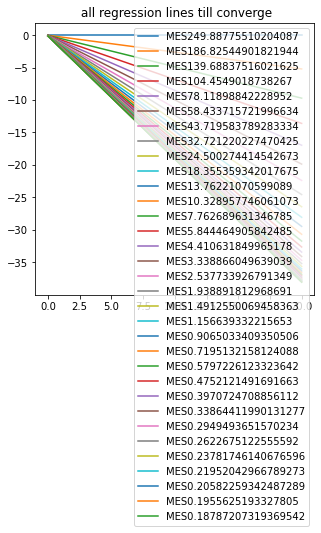

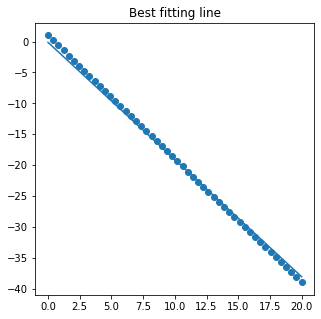

In [8]:
GD_SV_ALL_in_1 (Features,Y,0.001)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

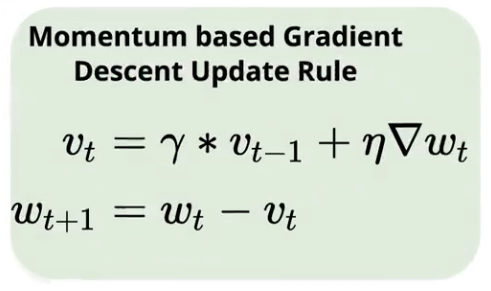

#### γ takes values between 0 and 1.
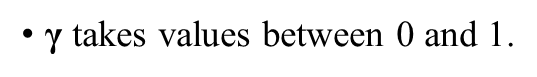

In [9]:
def Momentum_Based_GD (Data,Target,alpha,gamma):
    Earr=[]
    Carr=[]
    TH1arr=[]
    TH0arr=[]
    count=1
    Carr.append(count)
    X0=Data[:,0]
    X1=Data[:,1]
    TH0=0
    TH1=0
    Vo0=0
    Vo1=0
    TH1arr.append(TH1)
    TH0arr.append(TH0)
    TH=np.array([[TH0],[TH1]])
    YD=Data@TH
    Error=YD-Target
    MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
    Earr.append(MSError)
    GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
    GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
    GDV=np.array([[GDTH0],[GDTH1]])
    GDVN=np.linalg.norm(GDV)
    while(GDVN>=0.001):
        GDVN1=GDVN
        count+=1
        Carr.append(count)
        Vt0=gamma*Vo0+alpha*GDTH0
        Vt1=gamma*Vo1+alpha*GDTH1
        TH0=TH0-Vt0
        TH1=TH1-Vt1
        TH1arr.append(TH1)
        TH0arr.append(TH0)
        TH=np.array([[TH0],[TH1]])
        YD=Data@TH
        Error=YD-Target
        MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
        Earr.append(MSError)
        GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
        GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
        GDV=np.array([[GDTH0],[GDTH1]])
        GDVN=np.linalg.norm(GDV)
        Vo0=Vt0
        Vo1=Vt1
        if (abs(Earr[-1]-Earr[-2])<0.01):
            break
        
    return TH,Carr,Earr,count,TH1arr,TH0arr
    

In [10]:
TH,Carr,Earr,count,TH1arr,TH0arr=Momentum_Based_GD(Features,Y,0.001,0.5)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.9966440779369925

In [11]:
def MB_SV_ALL_in_1 (Features,Y,alpha,gamma):
    TH,Carr,Earr,count,TH1arr,TH0arr=Momentum_Based_GD (Features,Y,alpha,gamma)
    Y_pred_GD=Features@TH
    print(r2_score(Y,Y_pred_GD))
    plt.figure(figsize=(5,5))
    plt.plot(Carr,Earr)
    plt.xlabel("Number of eboch")
    plt.ylabel("MSE")
    plt.figure(figsize=(5,5))
    plt.plot(TH0arr,Earr)
    plt.xlabel("Theta0")
    plt.ylabel("MSE")
    plt.figure(figsize=(5,5))
    plt.plot(TH1arr,Earr)
    plt.xlabel("Theta1")
    plt.ylabel("MSE")
    x=np.linspace(0,20)
    y=a*x+b
    Thetas=[]
    for i in range(0,len(TH0arr)):
        Thetas.append([TH0arr[i],TH1arr[i]])
    plt.figure(figsize=(5,5))
    for i,j in enumerate (Thetas) :
        plt.plot(x,j[1]*x+j[0],label=f'MES{Earr[i]}')
        plt.legend()
    plt.title(" all regression lines till converge")

    plt.figure(figsize=(5,5))
    X=Features[:,1]
    plt.scatter(X,Y)
    plt.plot(x,Thetas[-1][1]*x+Thetas[-1][0])
    plt.title("Best fitting line")

0.9977803085105872


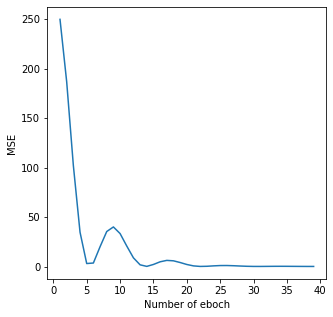

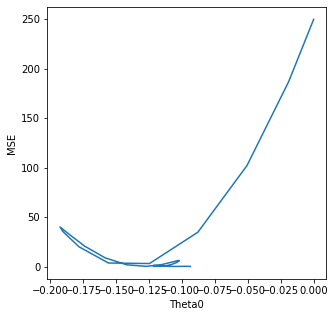

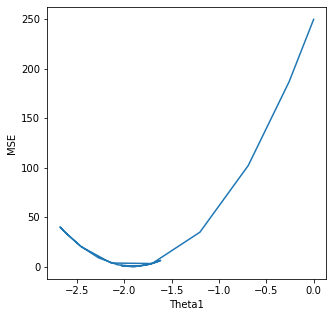

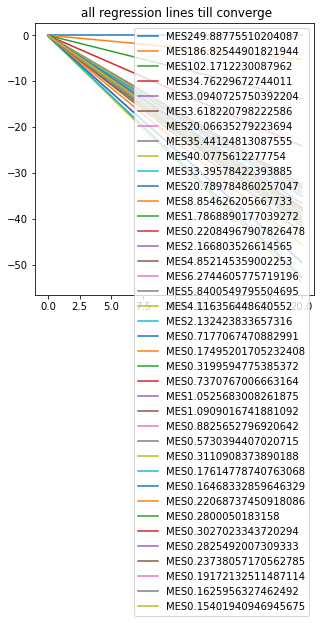

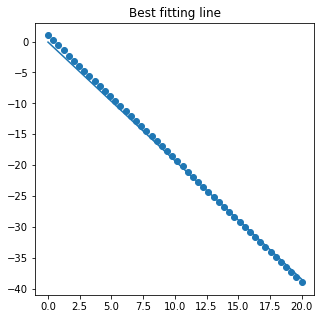

In [12]:
MB_SV_ALL_in_1 (Features,Y,0.001,0.8)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

0.9972924318863261


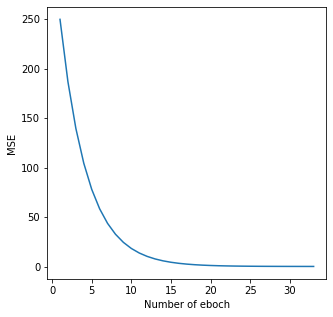

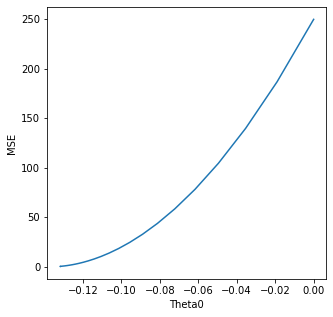

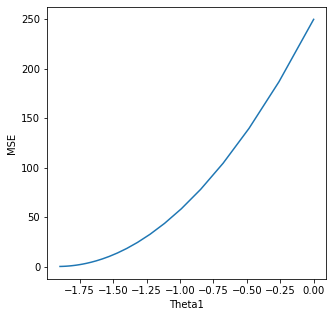

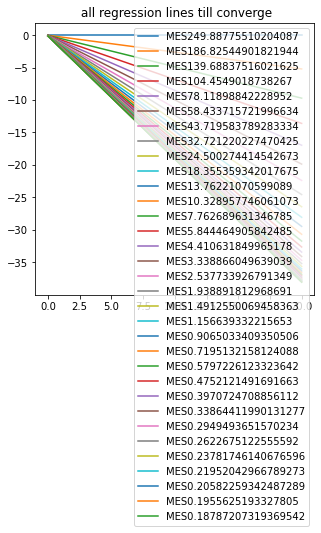

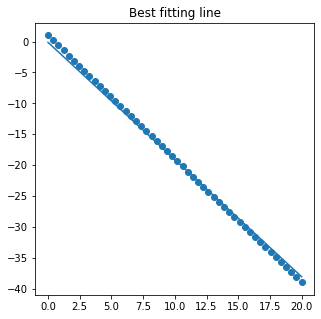

In [13]:
MB_SV_ALL_in_1 (Features,Y,0.001,0)

-2.6013005335843484


KeyboardInterrupt: 

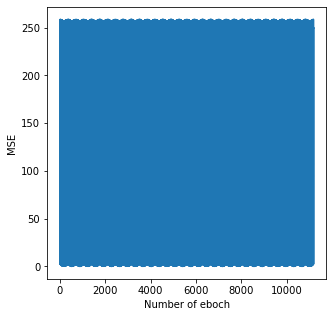

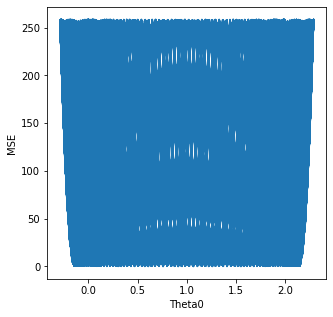

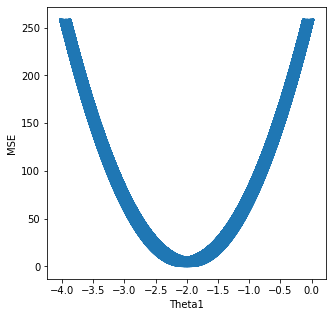

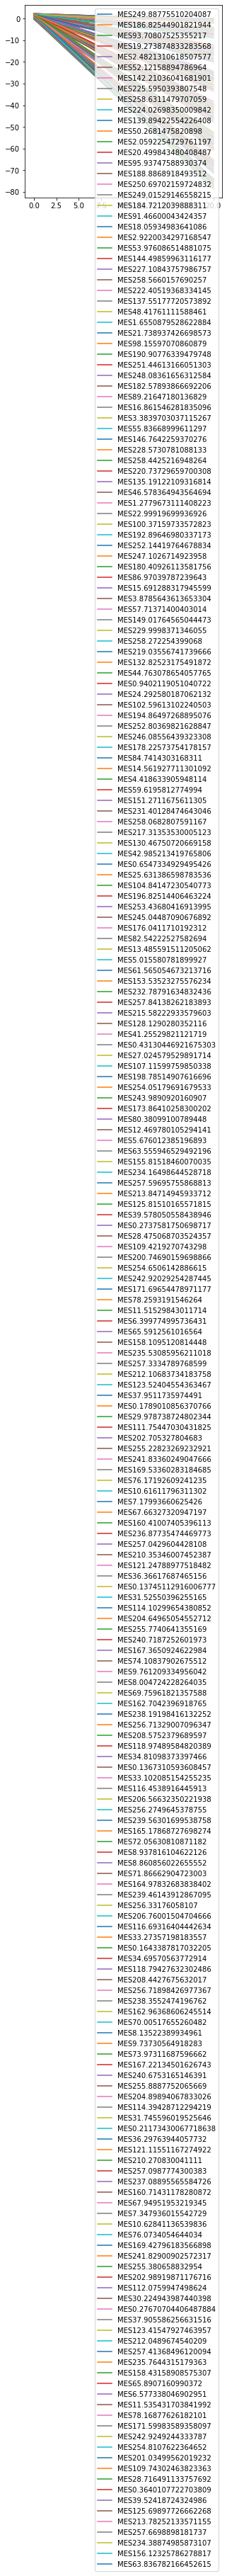

In [14]:
MB_SV_ALL_in_1 (Features,Y,0.001,1)

### Update your Batch GD for one variable  implementation to be NAG and check your results

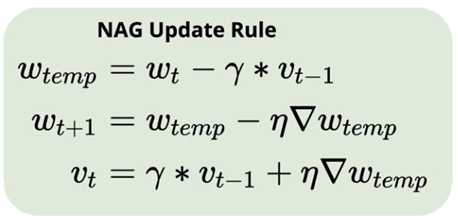

In [15]:
def NAG_GD (Data,Target,alpha,gamma):
    Earr=[]
    Carr=[]
    TH1arr=[]
    TH0arr=[]
    count=1
    Carr.append(count)
    X0=Data[:,0]
    X1=Data[:,1]
    TH0=0
    TH1=0
    Vo0=0
    Vo1=0
    TH1arr.append(TH1)
    TH0arr.append(TH0)
    TH=np.array([[TH0],[TH1]])
    YD=Data@TH
    Error=YD-Target
    MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
    Earr.append(MSError)
    GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
    GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
    GDV=np.array([[GDTH0],[GDTH1]])
    GDVN=np.linalg.norm(GDV)
    while(GDVN>=0.001):
        count+=1
        Carr.append(count)
        THt0=TH0-alpha
        THt1=TH1-gamma*Vo1
        YDt=Data@TH
        Errort=YDt-Target
        GDTHt0=((1/len(Target))*(Errort.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
        GDTHt1=((1/len(Target))*(Errort.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
        TH0=THt0-alpha*GDTHt0
        TH1=THt1-alpha*GDTHt1
        TH1arr.append(TH1)
        TH0arr.append(TH0)
        TH=np.array([[TH0],[TH1]])
        Vt0=gamma*Vo0+alpha*GDTHt0
        Vt1=gamma*Vo1+alpha*GDTHt1
        YD=Data@TH
        Error=YD-Target
        MSError=((np.linalg.norm(Error))**2)*(1/(2*len(Target)))
        Earr.append(MSError)
        GDTH0=((1/len(Target))*(Error.reshape(1,-1)@X0.reshape(-1,1)))[0,0]
        GDTH1=((1/len(Target))*(Error.reshape(1,-1)@X1.reshape(-1,1)))[0,0]
        GDV=np.array([[GDTH0],[GDTH1]])
        GDVN=np.linalg.norm(GDV)
        Vo0=Vt0
        Vo1=Vt1
        if (abs(Earr[-1]-Earr[-2])<0.01):
            break
        
    return TH,Carr,Earr,count,TH1arr,TH0arr
    

In [16]:
TH,Carr,Earr,count,TH1arr,TH0arr=NAG_GD(Features,Y,0.001,0.5)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.9968940247555623

In [17]:
TH,Carr,Earr,count,TH1arr,TH0arr=NAG_GD(Features,Y,0.001,1)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.977640883928142

Text(0, 0.5, 'MSE')

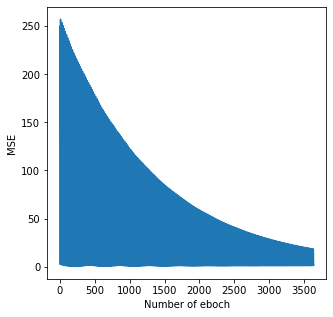

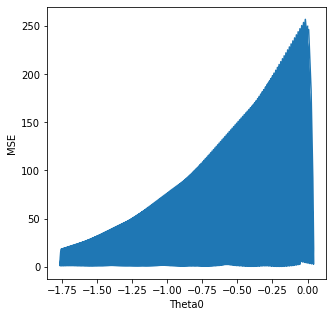

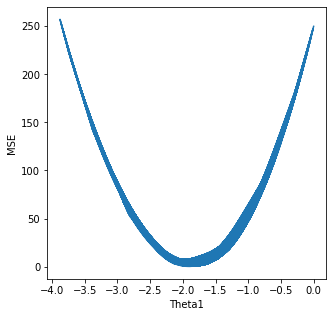

In [18]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of eboch")
plt.ylabel("MSE")
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

In [19]:
TH,Carr,Earr,count,TH1arr,TH0arr=NAG_GD(Features,Y,0.001,0)
Y_pred_GD=Features@TH
from sklearn.metrics import r2_score
r2_score(Y,Y_pred_GD)

0.9970726451879923

Text(0, 0.5, 'MSE')

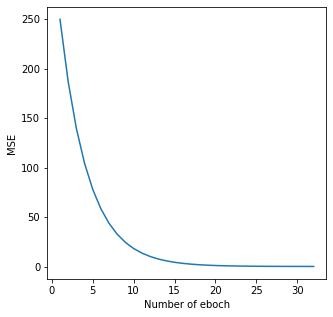

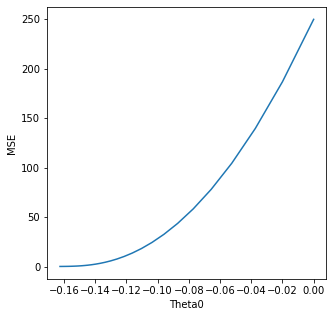

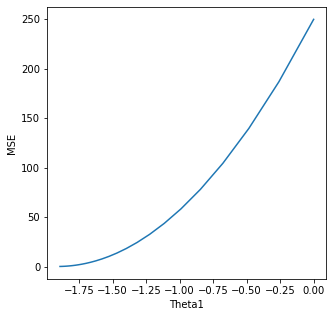

In [20]:
plt.figure(figsize=(5,5))
plt.plot(Carr,Earr)
plt.xlabel("Number of eboch")
plt.ylabel("MSE")
plt.figure(figsize=(5,5))
plt.plot(TH0arr,Earr)
plt.xlabel("Theta0")
plt.ylabel("MSE")
plt.figure(figsize=(5,5))
plt.plot(TH1arr,Earr)
plt.xlabel("Theta1")
plt.ylabel("MSE")

## Congratulations 
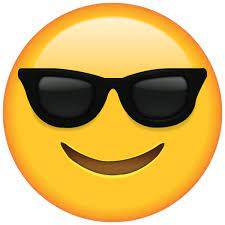